<a href="https://colab.research.google.com/github/ZhyShe/18ma573ZhiyuanShe/blob/master/src/hw3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider an european option with
- call type
- strike = 110
- maturity = T
underlying a Gbm stock with
- initial: 100
- interest rate: 4.75%
- vol ratio: $\sigma$

We denote this bsm price by $f(\sigma, T)$.

- Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

- Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

- Describe your observations. Do you think the same behavior is also true for put?

- Could you prove your observations?

In [0]:
!git clone https://github.com/ZhyShe/18ma573ZhiyuanShe

Cloning into '18ma573ZhiyuanShe'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 110 (delta 34), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (110/110), 131.08 KiB | 11.92 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [0]:
 cd /content/18ma573ZhiyuanShe/src/

/content/18ma573ZhiyuanShe/src


In [0]:
ls hw3_py.py

hw3_py.py


In [0]:
import numpy as np
import scipy.stats as ss
from hw3_py import Option
import matplotlib.pyplot as plt

In [0]:
class GBM:
  def __init__(self, init_state=100, drift_ratio=0.0475, vol_ratio=.2):
    self.init_state = init_state
    self.drift_ratio = drift_ratio
    self.vol_ratio = vol_ratio
    self.BsmPrice=0
  @staticmethod
  def bsm_price(gbm,option):
    s0 = gbm.init_state
    sigma = gbm.vol_ratio
    r = gbm.drift_ratio
    
    otype = option.Otype
    k = option.Strike
    maturity = option.Maturity
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    gbm.BsmPrice=(otype * s0 * ss.norm.cdf(otype * d1)- otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))
    return gbm.BsmPrice

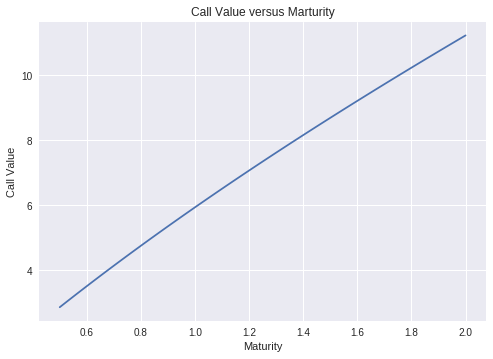

In [0]:
T=np.linspace(.5,2)
gbm=GBM()
option=Option(Maturity=T, Otype=1)
ys=GBM.bsm_price(gbm, option)
plt.figure()
plt.plot(T,ys)
plt.ylabel('Call Value')
plt.xlabel('Maturity')
plt.title('Call Value versus Marturity')
plt.show()

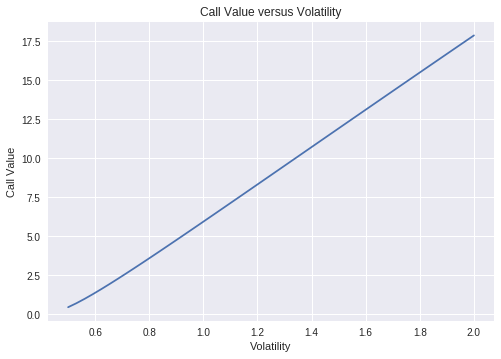

In [0]:
sigma=np.linspace(.05,.5)
gbm=GBM(vol_ratio = sigma)
option=Option(Maturity=1,Otype=1)
ys=GBM.bsm_price(gbm, option)
plt.figure()
plt.plot(T,ys)
plt.ylabel('Call Value')
plt.xlabel('Volatility')
plt.title('Call Value versus Volatility')
plt.show()